## 人工数据集生成

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 设置随机数种子
np.random.seed(5)

D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorf

In [4]:
# 直接采用np生成等差数列的方法，生成500个点，每个点的取值在0~100之间
x_data = np.linspace(-1,1,100)

# y=3.1234x+2.98+噪声，其中，噪声的维度与x_data一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

# np.random.randn(d0, d1, ..., dn)是从标准正态分布中返回一个或多个样本值
# 标准正态分布又称为u分布，是以0为均值，1为标准差的正态分布，记为N(0,1)

## 利用matplotlib画图


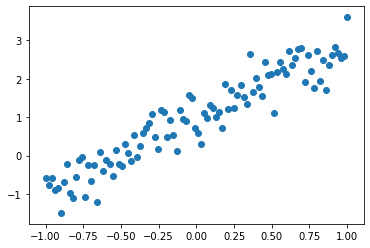

In [5]:
# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

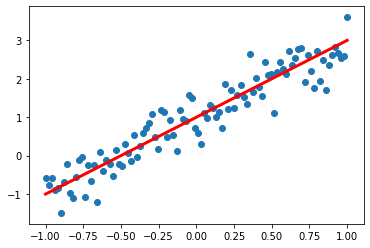

In [7]:
# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

# 画出我们想要学习得到的目标线性函数y=2x+1
plt.plot(x_data, 1.0+2*x_data, color='red', linewidth=3)

## 构建模型

In [8]:
# 定义训练数据的占位符，x是特征值，y是标签值
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')


# 定义模型函数
def model(x, w ,b):
    return tf.multiply(x,w) +b


# 创建变量
# TensorFlow变量的声明函数是tf.Variable
# tf.Variable的作用是保存和更新参数
# 变量的初始值可以是随机数、常数或者通过其他变量的初始值计算得到

# 构建线性函数的斜率，变量w
w = tf.Variable(3.0, name='w0')

# 构建线性函数的截距，变量b
b = tf.Variable(2.0, name='b0')

# pred是预测值，前向计算
pred = model(x, w, b)

## 训练模型

In [9]:
# 设置训练参数

# 迭代次数（训练轮数）
train_epochs = 10

# 学习率(建议一般设成0.1-0.01之间)
learning_rate = 0.1

display_step = 20 # 控制显示loss值的粒度

## 关于学习率（learning_rate）的设置

学习率的作用：控制参数更新的幅度。  
如果学习率设置过大，可能导致参数在极值附近来回摆动，无法保证收敛。  
如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

## 定义损失函数


In [10]:
# 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
# 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

# L2损失函数
# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))

## 定义优化器


In [11]:
# 定义优化器Optimizer，初始化一个GradientDescentOptimizer
# 设置学习率和优化目标：最小化损失

# 梯度下降优化器
optimmizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

## 创建会话

In [12]:
# 声明会话
sess = tf.Session()

In [13]:
# 变量初始化
# 在真正执行计算之前，需要将所有变量初始化
# 通过tf.global_variables_initializer函数可实现对所有变量的初始化

init = tf.global_variables_initializer()

sess.run(init)

## 迭代训练

### 显示损失值

Train Epoch: 01 Step:020 loss= 0.022781346
Train Epoch: 01 Step:040 loss= 0.043196335
Train Epoch: 01 Step:060 loss= 0.327444702
Train Epoch: 01 Step:080 loss= 0.044246536
Train Epoch: 01 Step:100 loss= 0.784076810
Train Epoch: 02 Step:120 loss= 0.005830352
Train Epoch: 02 Step:140 loss= 0.103049867
Train Epoch: 02 Step:160 loss= 0.487298131
Train Epoch: 02 Step:180 loss= 0.014644244
Train Epoch: 02 Step:200 loss= 0.871226072
Train Epoch: 03 Step:220 loss= 0.005577441
Train Epoch: 03 Step:240 loss= 0.105272762
Train Epoch: 03 Step:260 loss= 0.492662281
Train Epoch: 03 Step:280 loss= 0.013993245
Train Epoch: 03 Step:300 loss= 0.873951614
Train Epoch: 04 Step:320 loss= 0.005569831
Train Epoch: 04 Step:340 loss= 0.105340928
Train Epoch: 04 Step:360 loss= 0.492826134
Train Epoch: 04 Step:380 loss= 0.013973623
Train Epoch: 04 Step:400 loss= 0.874035001
Train Epoch: 05 Step:420 loss= 0.005569591
Train Epoch: 05 Step:440 loss= 0.105342977
Train Epoch: 05 Step:460 loss= 0.492830992
Train Epoch

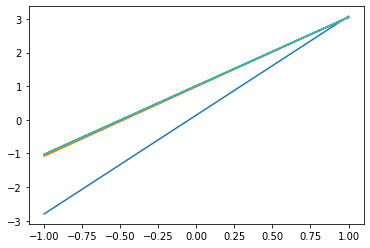

In [14]:
# 模型训练阶段，设置迭代轮次，每次通过将样本逐个输入模型，进行梯度下降优化操作，每轮迭代后，绘制出模型曲线

step = 0 # 记录训练步数
loss_list = [] # 用于保存loss值的列表

# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimmizer, loss_function], feed_dict={x: xs, y:ys})
        
        # 显示损失值loss
        # display_step:控制报告的粒度
        # 例如，如果display_step设为2，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改display_step不会更改模型所学习的规律
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print('Train Epoch:', '%02d' % (epoch+1), 'Step:%03d' % (step),
                 "loss=", "{:.9f}".format(loss))
            
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    
    plt.plot(x_data, w0temp*x_data+b0temp)# 画图

In [ ]:
# 模型训练阶段，设置迭代轮次，每次通过将样本逐个输入模型，进行梯度下降优化操作，每轮迭代后，绘制出模型曲线

step = 0 # 记录训练步数
loss_list = [] # 用于保存loss值的列表

# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimmizer, loss_function], feed_dict={x: xs, y:ys})
        
        # 显示损失值loss
        # display_step:控制报告的粒度
        # 例如，如果display_step设为2，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改display_step不会更改模型所学习的规律
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print('Train Epoch:', '%02d' % (epoch+1), 'Step:%03d' % (step),
                 "loss=", "{:.9f}".format(loss))
            
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    
    plt.plot(x_data, w0temp*x_data+b0temp)# 画图

## 打印结果

In [ ]:
print('w:', sess.run(w))
print('b:', sess.run(b) )

## 图形化显示损失值

In [ ]:
plt.plot(loss_list)

In [ ]:
plt.plot(loss_list, 'r+')

In [ ]:
[x for x in loss_list if x>1]

## 随机梯度下降  
在梯度下降法中，批量指的是用于在单次迭代中计算梯度的样本总数。  

假定批量是指整个数据集，数据集通常包含很大样本（数万甚至数千亿），此外，数据集通常包含多个特征。因此，一个批量可能相当巨大。如果是超大批量，则单词迭代就可能要花费很长时间进行计算。  

随机梯度下降法（SGD）每次迭代只使用一个样本（批量大小为1），如果进行足够的迭代，SGD也可以发挥作用。“随机”这一术语表示构成各个批量的一个样本都是随机选择的。  

小批量随机梯度下降法（小批量SGD）是介于全批量与SGD之间的折衷方案。小批量通常包含10-1000个随机选择的样本。小批量SGD可以减少SGD中的杂乱样本数量，但仍然 比全批量更高效。

## 进行预测


In [ ]:
x_test = 3.21

predict = sess.run(pred, feed_dict={x:x_test})
print('预测值：%f'%predict)

target = 2*x_test + 1.0
print('目标值：%f'%target)